<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Parcial2/Parcial2PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from IPython.display import clear_output
!sudo apt install megatools -y
clear_output()

In [ ]:
!git clone https://github.com/FelipeFerAl/ImageProcessing

Cloning into 'ImageProcessing'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 213 (delta 26), reused 1 (delta 1), pack-reused 172 (from 1)
Receiving objects: 100% (213/213), 79.13 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [2]:
def precision(y_true, y_pred):
  accuracy = 0
  for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
      accuracy += 1
  return accuracy / len(y_true) * 100

#**MNIST**

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_mnist = Sequential()
model_mnist.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))
model_mnist.add(Flatten())
model_mnist.add(Dense(128, activation='relu'))
model_mnist.add(Dense(10, activation='softmax'))

model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_mnist = tf.keras.models.load_model('ImageProcessing/Parcial2/modelo_mnist.keras')

In [ ]:
# model_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8927 - loss: 0.3577 - val_accuracy: 0.9737 - val_loss: 0.0879
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9814 - loss: 0.0618 - val_accuracy: 0.9791 - val_loss: 0.0728
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.9763 - val_loss: 0.0874
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9809 - val_loss: 0.0795
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9808 - val_loss: 0.0783
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9794 - val_loss: 0.0885
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9972 - loss: 0.0076 - val_accuracy: 0.9791 - val_loss: 0.0913
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9979 -

In [ ]:
y_pred_mnist = model_mnist.predict(x_test_mnist)
y_pred_mnist = np.argmax(y_pred_mnist, axis=1)
accuracy_mnist = precision(y_test_mnist, y_pred_mnist)
print(f"Precisión: {round(accuracy_mnist,3)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precisión: 98.14%


In [ ]:
# model_mnist.save('modelo_mnist.keras')

#**FASHION MNIST**

In [ ]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = tf.keras.datasets.fashion_mnist.load_data()

x_train_fmnist = x_train_fmnist / 255.0
x_test_fmnist = x_test_fmnist / 255.0

In [ ]:
model_fmnist = Sequential()

model_fmnist.add(Conv2D(32, (3, 3), strides=2, activation='relu', padding='same', input_shape=(28,28,1)))
model_fmnist.add(BatchNormalization())
model_fmnist.add(Flatten())
model_fmnist.add(Dense(128, activation='relu'))
model_fmnist.add(Dropout(0.5))
model_fmnist.add(Dense(10, activation='softmax'))

model_fmnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_fmnist = tf.keras.models.load_model('ImageProcessing/Parcial2/modelo_fmnist.keras')

In [ ]:
# model_fmnist.fit(x_train_fmnist, y_train_fmnist, epochs=10, validation_data=(x_test_fmnist, y_test_fmnist))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7852 - loss: 0.6210 - val_accuracy: 0.8711 - val_loss: 0.3565
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8721 - loss: 0.3492 - val_accuracy: 0.8821 - val_loss: 0.3165
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8916 - loss: 0.2969 - val_accuracy: 0.8902 - val_loss: 0.3038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9014 - loss: 0.2689 - val_accuracy: 0.8980 - val_loss: 0.2957
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9112 - loss: 0.2409 - val_accuracy: 0.8979 - val_loss: 0.3104
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9174 - loss: 0.2186 - val_accuracy: 0.8909 - val_loss: 0.3411
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9241 - loss: 0.2034 - val_accuracy: 0.9047 - val_loss: 0.3183
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9288 -

In [ ]:
y_pred_fmnist = model_fmnist.predict(x_test_fmnist)
y_pred_fmnist = np.argmax(y_pred_fmnist, axis=1)
accuracy_fmnist = precision(y_test_fmnist, y_pred_fmnist)
print(f"Precisión: {round(accuracy_fmnist,3)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precisión: 90.69%


In [ ]:
# model_fmnist.save('modelo_fmnist.keras')

#**CIFAR10**

In [3]:
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = tf.keras.datasets.cifar10.load_data()

x_train_cifar10 = x_train_cifar10 / 255.0
x_test_cifar10 = x_test_cifar10 / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [36]:
model_cifar10 = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', strides=2),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cifar10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!megadl "https://mega.nz/file/zu5BQI5Y#BBXYVbSxae3MSV5PZ7xE_9LstSvqW1NIHnPmKQTn-a0"
model_c10 = tf.keras.models.load_model('/content/modelo_c10.keras')

In [37]:
model_cifar10.fit(x_train_cifar10, y_train_cifar10, epochs=15, validation_split=0.3)

Epoch 1/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.2337 - loss: 2.2355 - val_accuracy: 0.3572 - val_loss: 1.8085
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.3638 - loss: 1.6826 - val_accuracy: 0.5180 - val_loss: 1.3680
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4681 - loss: 1.4325 - val_accuracy: 0.5655 - val_loss: 1.2613
Epoch 4/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5543 - loss: 1.2166 - val_accuracy: 0.5692 - val_loss: 1.3022
Epoch 5/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6207 - loss: 1.0522 - val_accuracy: 0.6537 - val_loss: 1.0242
Epoch 6/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6730 - loss: 0.9121 - val_accuracy: 0.6994 - val_loss: 0.8961
Epoch 7/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7172 - loss: 0.7970 - val_accuracy: 0.6516 - val_loss: 1.1087
Epoch 8/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7527 -

In [38]:
y_pred_cifar10 = model_cifar10.predict(x_test_cifar10)
y_pred_cifar10 = np.argmax(y_pred_cifar10, axis=1)
accuracy_cifar10 = precision(y_test_cifar10, y_pred_cifar10)
print(f"Precisión: {round(accuracy_cifar10,3)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Precisión: 74.39%


In [39]:
# model_cifar10.save('modelo_cifar10.keras')

#**CIFAR100**

In [41]:
(x_train_cifar100, y_train_cifar100), (x_test_cifar100, y_test_cifar100) = tf.keras.datasets.cifar100.load_data()

x_train_cifar100 = x_train_cifar100 / 255.0
x_test_cifar100 = x_test_cifar100 / 255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [46]:
model_cifar100 = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', strides=2),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # BatchNormalization()
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_cifar100.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model_cifar100.fit(x_train_cifar100, y_train_cifar100, epochs=15, validation_split=0.3)

Epoch 1/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.0099 - loss: 4.7529 - val_accuracy: 0.0081 - val_loss: 4.6062
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.0104 - loss: 4.6053 - val_accuracy: 0.0081 - val_loss: 4.6068
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.0092 - loss: 4.6055 - val_accuracy: 0.0103 - val_loss: 34.1418
Epoch 4/15


KeyboardInterrupt: 

In [32]:
y_pred_cifar100 = model_cifar100.predict(x_test_cifar100)
y_pred_cifar100 = np.argmax(y_pred_cifar100, axis=1)
accuracy_cifar100 = precision(y_test_cifar100, y_pred_cifar100)
print(f"Precisión: {round(accuracy_cifar100,3)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Precisión: 74.16%


In [34]:
model_cifar100.save('modelo_cifar100.keras')

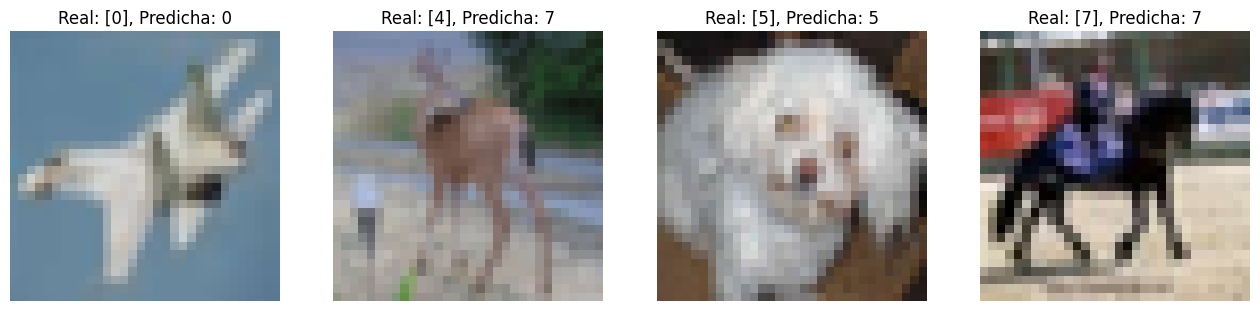

In [33]:
idxs = [10,100,1000,5000]
plt.figure(figsize=(16,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(x_test_cifar100[idxs[i]])
  plt.title(f"Real: {y_test_cifar100[idxs[i]]}, Predicha: {y_pred_cifar100[idxs[i]]}")
  plt.axis('off')